### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([99,112,181,186,378,379,381,414,619,1058,1209,1213,1215,1216,1217,1226,1227,1237,1238,1239,1240,1242,1243,1244,1246,1248,1250,1253,1257,1258,1265,1266,1267,1268,1270,1278,1280,1281,1285,1307,1309,1310,1311,1319,1320,1324,1326,1327,1328,1331,1333,1338,1341,1344,1348,1349,1351,1352,1355,1356,1357,1358,1359,1360,1361,1372,1373,1376,1380,1382,1386,1387,1388,1389,1390,1393,1407,1410,1412,1414,1418,1421,1422,1423,1424,1429,1437,1438,1440,1448,1450,1470,1471,1477,1492,1493,1494,1495,1496,1498,1499,1505,1507,1513,1514,1515,1516,1517,1519,1520,1521,1522,1523,1524,1531,1532,1534,1535,1536,1537,1539,1540,1541,1543,1545,1554,1557,1558,1562,1563,1564,1568,1570,1572,1574,1577,1580,1581,1588,1589,1593,1594,1596,1597,1598,1599,1609,1613,1625,1629,1630,1631,1632,1633,1636,1637,1646,1647,1648,1651,1653,1655,1657,1659,1660,1672,1673,1683,1684,1690,1691,1692,1698,1699,1700,1701,1703,1708,1712,1714,1715,1716,1717,1730,1731,1733,1735,1738,1748,1750,1751,1754,1759,1766,1769,1773,1774,1777,1778,1779,1783,1786,1796,1802,1803,1804,1808,1823,1824,1830,1831,1853,1854,1864,1868,1869,1870,1872,1876,1879,1880,1881,1882,1883,1884,1885,1891,1898,1900,1903,1904,1908,1909,1910,1911,1926,1931,1936,1937,1938,1939,1951,1952,1954,1955,1967,1980,1986,1989,1994,2013,2014,2015,2016,2017,2018,2019,2020,2024,2025,2026,2030,2031,2032,2033,2034,2035,2037,2038,2041,2042,2043,2044,2046,2047,2048,2049,2054,2064,2065,2066,2070,2074,2077,2078,2082,2083,2084,2085,2086,2087,2088,2089,2092,2097,2098,2100,2102,2104,2121,2122,2123,2125,2128,2129,2130,2131,2132,2141,2144,2145,2146,2147,2148,2149,2150,2151,2154,2159,2163,2167,2168,2169,2170,2171,2186,2187,2201,2202,2203,2205,2208,2211,2214,2217,2219,2222,2228,2231,2233,2234,2243,2246,2254,2255,2256,2257,2258,2259,2261,2263,2265,2266,2276,2279,2312,2313,2314,2318,2328,2336,2337,2338,2351,2356,2357,2359,2360,2361,2512,2513,2605,3414,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3545,3559,3704,3821,4519,4524,4873,5783,5800,5828,5840,5916,5970,6122,6229,6230,6231,6232,6233,6234,6269,6316,6401,6577,6578,6581,6598,6599,6630,6631,6789,7228,7310,7359,7363,7455,7456,7526,7545,7723,7761,7762,7998,8090,8105,8179,8227,8230,8232,8319,8401,8592,8679,8683,8685,8972,9091,9233,9234,9260,9261,9317,9387,9388,9459,9460,9461,9462,9463,9464,9465,9466,9467,9468,9469,9470,9471,9839,9999,10340,11058,11141,11326,11360,11361,11368,11606,11607,11675,11915,11987,13159,13160,13161,13164,13165,13166,13167,13168,13169,13171,13172,13344,13391,13392,13393,13394,13395,13437,13438,13439,13440,13441,13442,13887,14164,14268,14327,14328,14387,14388,14392,14393,14394,14395,14434,14605,14911,14976,14977,15070,15071,15245,15246,15698,15737,15956,15969,15971,16295,16296,16300,16301,16313,16319,16320,16323,16324,16329,16331,16333,16334,16335,16336,16337,16338,16340,16354,16356,16361,16364,16371,16429,16442,16560,16562,16563,16602,16698,16699,17023,17139,17461,17462,17502,17611,17964,18090,18122,18421,18489,18570,18654,18682,18712,18744,19110,19192,19523,19633,19752,19842,19847,20271,20400,20403,20477,20508,20705,20722,21021,21106,21290,21348,21916,21917,21918,21919,22619,22620,22621,22622,22623,22624,22625,22630,22720,22852,22937,22938,23164,23165,23166,23168,23169,23170,23172,23173,23174,23175,23176,23177,23178,23179,23180,23181,23182,23183,23184,23185,23187,23189,23191,23193,23196,23197,23198,23199,23200,23201,23203,23204,23205,23206,23208,23209,23210,23211,23213,23214,23215,23216,23217,23218,23219,23220,23222,23224,23228,23229,23230,23231,23232,23233,23234,23235,23236,23237,23238,23239,23240,23241,23242,23243,23244,23245,23247,23248,23249,23251,23252,23274,23275,23442,23443,23444,23445,23446,23447,23448,23449,23450,23814,23918,23921,23923,23929,23931,23934,23935,23936,23937,23938,23939,23957,23972,23973,24270,24348,24355,24551,24623,24625,24626,24629,24657,24950,24954,25090,25129,25130,25131,25132,25133,25134,25135,25136,25137,25138,25139,25140,25141,25142,25143,25144,25145,25146,25147,25148,25149,25150,25151,25152,25153,25154,25155,25156,25157,25158,25159,25160,25161,25162,25163,25164,25165,25166,25167,25168,25169,25170,25171,25172,25173,25174,25175,25176,25177,25178,25179,25180,25181,25182,25183,25184,25185,25186,25187,25188,25189,25190,25191,25192,25193,25194,25195,25196,25197,25198,25199,25200,25201,25202,25203,25204,25205,25206,25207,25208,25209,25210,25211,25212,25213,25214,25215,25216,25217,25218,25219,25220,25221,25222,25223,25224,25225,25226,25227,25228,25229,25230,25231,25232,25233,25234,25235,25236,25237,25238,25239,25240,25241,25242,25243,25244,25245,25246,25247,25248,25249,25250,25251,25252,25253,25254,25255,25256,25257,25258,25259,25260,25261,25262,25263,25264,25265,25266,25267,25268,25269,25270,25271,25272,25273,25274,25275,25276,25277,25278,25279,25280,25281,25282,25283,25284,25285,25286,25287,25288,25289,25290,25291,25292,25293,25294,25295,25296,25297,25298,25299,25300,25301,25302,25303,25304,25305,25306,25307,25308,25309,25310,25311,25312,25313,25314,25315,25316,25317,25318,25319,25320,25321,25322,25323,25324,25325,25326,25327,25328,25329,25330,25331,25332,25333,25334,25335,25336,25337,25338,25339,25340,25341,25342,25343,25349,25397,25450,25454,25455,25495,25496,25578,25673,25674,25679,25684,25686,25689,25691,25740,26093,26153,26154,26295,26296,26297,26758,26759,26760,26761,26762,26945,26946,27946,28060,28785,28913,29224,29225,29331,29460,29527,29644,29908,30124,30221,30222,30223,30354,30355,30476,30477,30478,30479,30480,30481,30540,30541,30542,30551,30661,30663,30665,30666,30668,30669,30915,30919,30925,30947,30996,31130,31131,31133,31134,31135,31136,31137,31138,31139,31140,31141,31142,31143,31144,31145,31146,31147,31148,31149,31150,31151,31152,31154,31155,31156,31157,31158,31159,31160,31161,31162,31163,31164,31165,31167,31169,31170,31171,31172,31173,31174,31175,31176,31177,31178,31179,31180,31181,31182,31183,31185,31186,31187,31190,31191,31192,31193,31194,31196,31197,31198,31199,31201,31202,31203,31204,31205,31206,31207,31208,31209,31210,31211,31341,31412,31453,31489,31490,31491,31817,31985,32160,32304,32305,32335,32375,32475,32544,32545,32546,32547,32692,32712,32715,32716,32717,32718,32719,32720,32721,32722,32723,32724,32725,32726,32727,32728,32937,32938,32939,33017,33123,33306,33307,33358,33359,33450,33589,33627,33698,33876,33877,34012,34351,34352,34356,34401,34408,34411,34470,34471,34472,34473,34487,34490,34491,34495,34526,34593,34753,34754,34942,34998,35050,35119,35121,35124,35126,35128,35129,35130,35227,35233,35238,35272,35273,35278,35285,35287,35288,35310,35339,35432,35514,35587,35590,35592,35595,35710,35718,35930,36026,36034,36035,36036,36289,36344,36389,36416,36599,36652,36653,36654,36655,36656,36657,36658,36659,36660,36661,36662,36663,36664,36665,36666,36792,36793,36818,36875,37139,37192,37193,37194,37195,37196,37197,37199,37200,37201,37202,37203,37204,37205,37206,37207,37209,37504,37716,38507,38570,38655,39087,39089,39090,39093,39094,39095,39101,39102,39103,39104,39106,39108,39118,39122,39129,39244,39467,39527,39529,39798,39800,39877,39909,39910,39911,39912,39913,39914,39917,39918,39922,39923,39932,39933,39945,39946,39947,39948,39949,39950,39971,40034,40039,40052,40111,40241,40302,40323,40437,40921,40957,41010,41046,41203,41214,41399,41430,41539,41605,41606,41640,41641,41922,41933,42267,42309,42310,42363,42388,42766,42826,42941,43045,43142,43441,43464,43482,43518,43534,43566,43641,44543,44546,44830,44831,44844,45048,45068,45182,45397,45470,45532,45773,45774,45775,45776,45777,45778,45779,45780,45781,45782,45783,45784,45785,45786,45788,45789,45852,45947,45987,45988,45989,45997,45998,45999,46000,46001,46002,46003,46004,46007,46008,46010,46011,46013,46014,46024,46028,46030,46032,46036,46039,46041,46044,46046,46049,46051,46053,46054,46057,46062,46065,46066,46068,46070,46072,46074,46080,46082,46089,46091,46092,46095,46096,46099,46100,46101,46102,46103,46104,46105,46106,46107,46109,46110,46111,46112,46114,46709,46710,47089,47090,47092,47285,47288,47383,47390,47612,47630,47636,47905,47906,48139,48720,48828,49124,49461,49462,49463,49464,49465,49466,49704,49988,49989,49990,49991,49992,50205,50516,50518,50519,50521,50522,50598,50599,50601,50627,50630,50683,50719,50721,51209,51210,51288,51289,51290,51291,51292,51293,51294,51295,51296,51297,51298,51299,51300,51301,51302,51303,51304,51305,51306,51307,51308,51571,51572,51576,51582,51583,51588,51589,51591,51593,51594,51595,51597,51598,51600,51601,51602,51603,51604,51605,51607,51609,51610,51611,51615,51616,51617,51618,51619,51620,51622,51717,51720,52161,52196,52197,52199,52221,52347,52537,52538,52703,52717,52718,52719,52720,52721,52725,52781,52805,52908,53050,53318,53636,53784,53811,53998,54013,54014,54015,54316,54432,54449,54507,54776,55023,55033,55071,55168,55169,55251,55307,55712,55823,55996,56094,56211,56488,56605,56616,56650,56669,56670,56895,56896,56938,57091,57092,57185,57186,57187,57188,57230,57586,57587,57588,57607,57679,57856,57991,58228,58411,58548,58631,58636,58642,58650,58652,58654,58657,58659,58663,58665,58667,58668,58671,58672,58674,58676,58677,58678,58679,58680,58681,58774,58775,58787,58807,59078,59079,59110,59111,59208,59608,59650,59696,59749,59755,59781,59782,59783,59784,59961,60053,60345,60348,60349,60405,60508,60591,60628,60700,60743,60744,60799,60919,60920,61044,61045,61123,61137,61138,61301,61484,61517,61529,61624,61788,62114,62264,62267,62337,62383,62501,62532,62534,62541,63013,63047,63057,63058,63059,63060,63238,63240,63252,63701,63920,63921,64179,64191,64192,64259,64260,64261,64262,64263,64264,64265,64266,64267,64373,64435,64512,64661,65018,65027,65028,65029,65030,65033,65034,65542,65754,65790,66088,66894,67025,67026,67027,67028,67029,67031,67874,67984,68191,68192,68278,68374,68385,68417,68688,68707,68710,68750,68954,68955,68956,68957,69061,69101,69425,69463,69495,69562,69672,69680,69932,69988,69989,70031,70045,70047,70215,70292,70315,70349,70544,70604,70663,70665,70902,71168,71169,71411,73825,74021,74022,74023,74027,74329,74480,74481,74528,74623,74903,74904,74905,75056,75283,75669,75946,76146,76229,76406,76409,76410,76412,76415,76422,76423,76497,76653,76964,76966,76980,77033,77178,77297,77525,77677,77827,77839,77997,78201,78445,78759,78804,78805,78870,78871,78913,79478,79479,79630,79632,79889,79904,80103,80175,80220,80403,80892,81155,81178,81272,81578,81636,81689,81791,82088,82264,82460,82466,82778,83273,83754,84042,84183,84317,84457,84464,84566,84608,84953,85443,85444,85686,85687,85688,85689,85690,85691,85692,85693,85694,85695,85696,85697,85698,85699,85700,85701,85703,85704,85705,85708,85709,85710,85711,85712,85713,85714,85715,85716,85717,85718,85834,85990,86141,86278,86280,86281,86283,86539,86646,86648,87302,87303,87315,87417,87420,87836,87837,88017,88119,88212,89103,89192,89419,89552,89634,89860,89875,89916,89937,90041,90409,90411,90469,90589,90754,90897,91814,91839,91840,92185,92188,92189,92192,92193,92194,92195,92197,92198,92199,92202,92225,92383,92393,92478,92522,92545,92547,92777,92991,92992,92993,92995,92996,92997,92999,93073,93250,93253,93257,93318,93429,93570,93705,94284,94741,94932,95049,95074,95274,95364,95428,95430])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(1918, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(1838403,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

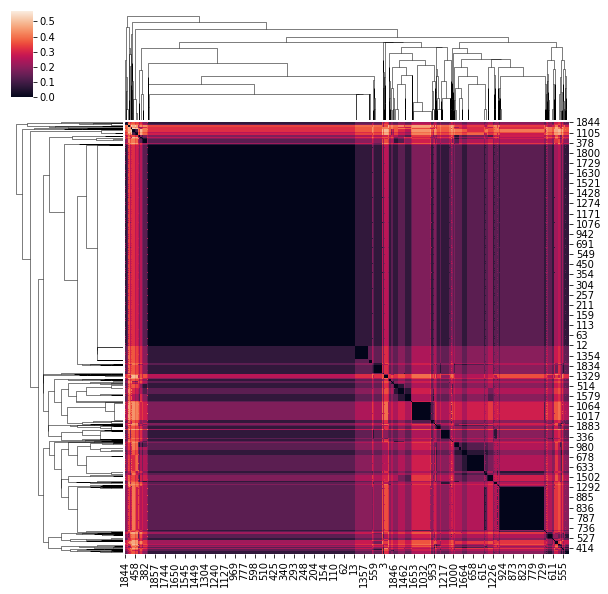

In [12]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

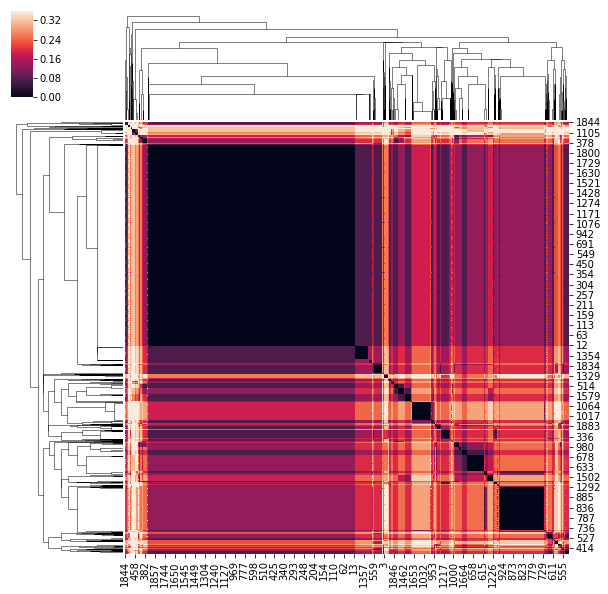

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

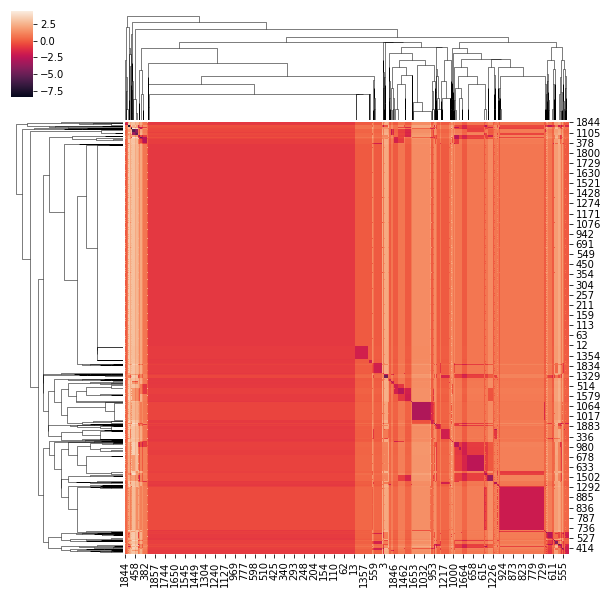

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

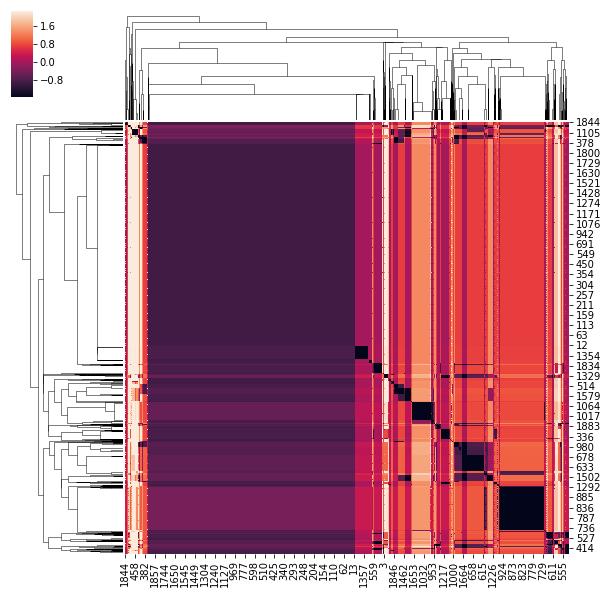

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)